Load data

In [1]:
from scipy.fftpack import fft, fftfreq, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt

fname = 'bounds_change_data.npz'
dat = np.load(fname)
t = dat['t']
chi_t = dat['chi_t']
Sig_back_trc = dat['Sig_back_trc']
Ref_back_trc = dat['Ref_back_trc']
Sig_trc = dat['Sig_trc']
Ref_trc = dat['Ref_trc']

Plot $\chi$

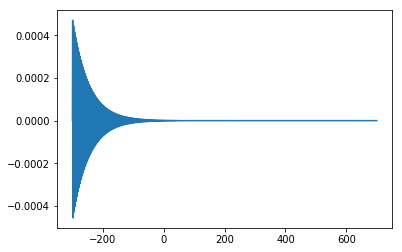

In [2]:
# CHI STUFF
fig2 = plt.figure(2)
f2_ax1 = fig2.add_subplot(1,1,1); 
f2_ax1.plot(t,chi_t)
plt.show()

Basic FFT stuff

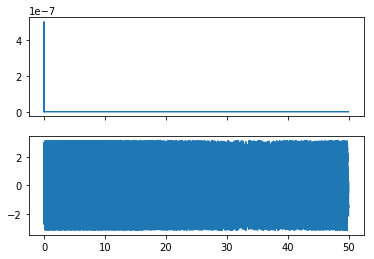

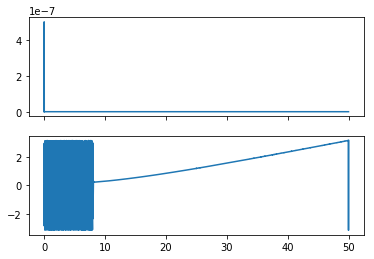

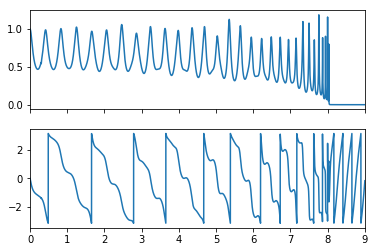

In [3]:
# Calculate time difference
dt = np.diff(t)[0] # Calculate time step difference

# Calculate Fourier transforms
freq = fftfreq(len(t), dt)
incf = fft(Ref_trc)
trans = fft(Sig_trc)

# Determine the number of data points and trim transforms to size
dpoints = len(freq)
freq = freq[0:int(dpoints/2)]
incf = incf[0:int(dpoints/2)]
trans = trans[0:int(dpoints/2)]

# Calculate spectrum in frequency
spec = np.divide(trans, incf)
spec_a = np.angle(spec)
spec_m = np.absolute(spec)

# Plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(freq, np.absolute(incf))
ax1.plot(freq, np.angle(incf))
plt.show()

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(freq, np.absolute(trans))
ax1.plot(freq, np.angle(trans))
plt.show()

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.plot(freq, spec_m)
ax1.plot(freq, spec_a)
ax1.set_xlim(0, 9)
plt.show()

We wish to calculate the index of refraction
$$\tilde{n}(\omega)=n(\omega)+i\kappa(\omega)$$
where $\kappa\ll n$. From Benjamin Ofori-Okai's 2016 PhD thesis p. 132 we note that in this case
$$n(\omega)=\frac{c_0}{\omega d}\phi(\omega)+1$$
where $\phi$ is the phase of the complex transmission $\tilde{T}$ and $d$ is the length of the material. Ben's thesis also notes that
$$\kappa(\omega)=-\frac{c_0}{\omega d}\ln{\left(A(\omega)\frac{\left(n(\omega)+1\right)^2}{4n(\omega)}\right)}$$
where $A(\omega)$ is the magnitude of the complex transmission $\tilde{T}$.

In [4]:
# Set constants (MAKE SURE THAT THESE ARE UP TO DATE WITH DATA TO LOAD IN)
c0 = 1 # Taken from original.py
L = 0.09 # Material length

# Calculate omega
omega = 2 * np.pi * freq

# Calculate coefficients
coeff = np.divide(c0, np.multiply(omega, L))

# Calculate the real part of the index of refraction
n = np.multiply(coeff, spec_a) + 1

# Calculate the imaginary part of the index of refraction
kappa = np.multiply(-coeff, np.log(np.multiply(spec_m, np.divide(np.square(n+1), 4*n))))

/Users/jroth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/jroth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/Users/jroth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


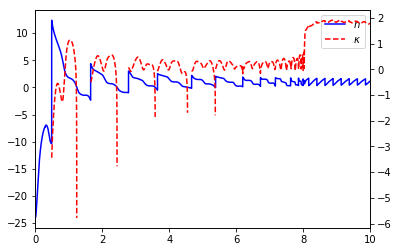

In [7]:
fig = plt.figure()
ax0 = plt.gca()
ax1 = ax0.twinx()
n_line, = ax0.plot(freq, n, 'b-')
kappa_line, = ax1.plot(freq, kappa, 'r--')
ax0.legend((n_line, kappa_line), ('$n$', '$\kappa$'), loc=1)
ax0.set_xlim(0,10)
plt.show()